In [4]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *

from pmdarima.arima import auto_arima
from matplotlib import pyplot as plt
from matplotlib import dates
import seaborn as sb

# 시계열 분석 연구과제

## 문제 1

다음의 데이터는 1937년 07월 01일부터 2023년 08월 06일까지 서울의 평균 기온을 조사한 자료의 일부이다.

| 날짜         | 평균기온(℃) |
|------------|---------|
| 1973-07-01 | 22.7    |
| 1973-07-02 | 23.8    |
| 1973-07-03 | 27.2    |
| 1973-07-04 | 25.2    |
| 1973-07-05 | 26.9    |

전체 자료는 아래의 URL을 통해 내려받을 수 있다.

```plain
https://data.hossam.kr/tsdata/temperatures_seoul.xlsx
```

이 데이터를 활용하여 조사기간동안 서울의 평균기온이 어떻게 변화하고 있는지 분석하고 앞으로 1년간의 평균 기온을 시각화 하시오.

시각화 기간은 2023년 8월 6일을 기준으로 전후 1년간으로 한다.



In [9]:
origin = my_read_excel(path='https://data.hossam.kr/tsdata/temperatures_seoul.xlsx', index_col="날짜", timeindex=True, info=False)
df = origin.copy()

### 평균이동

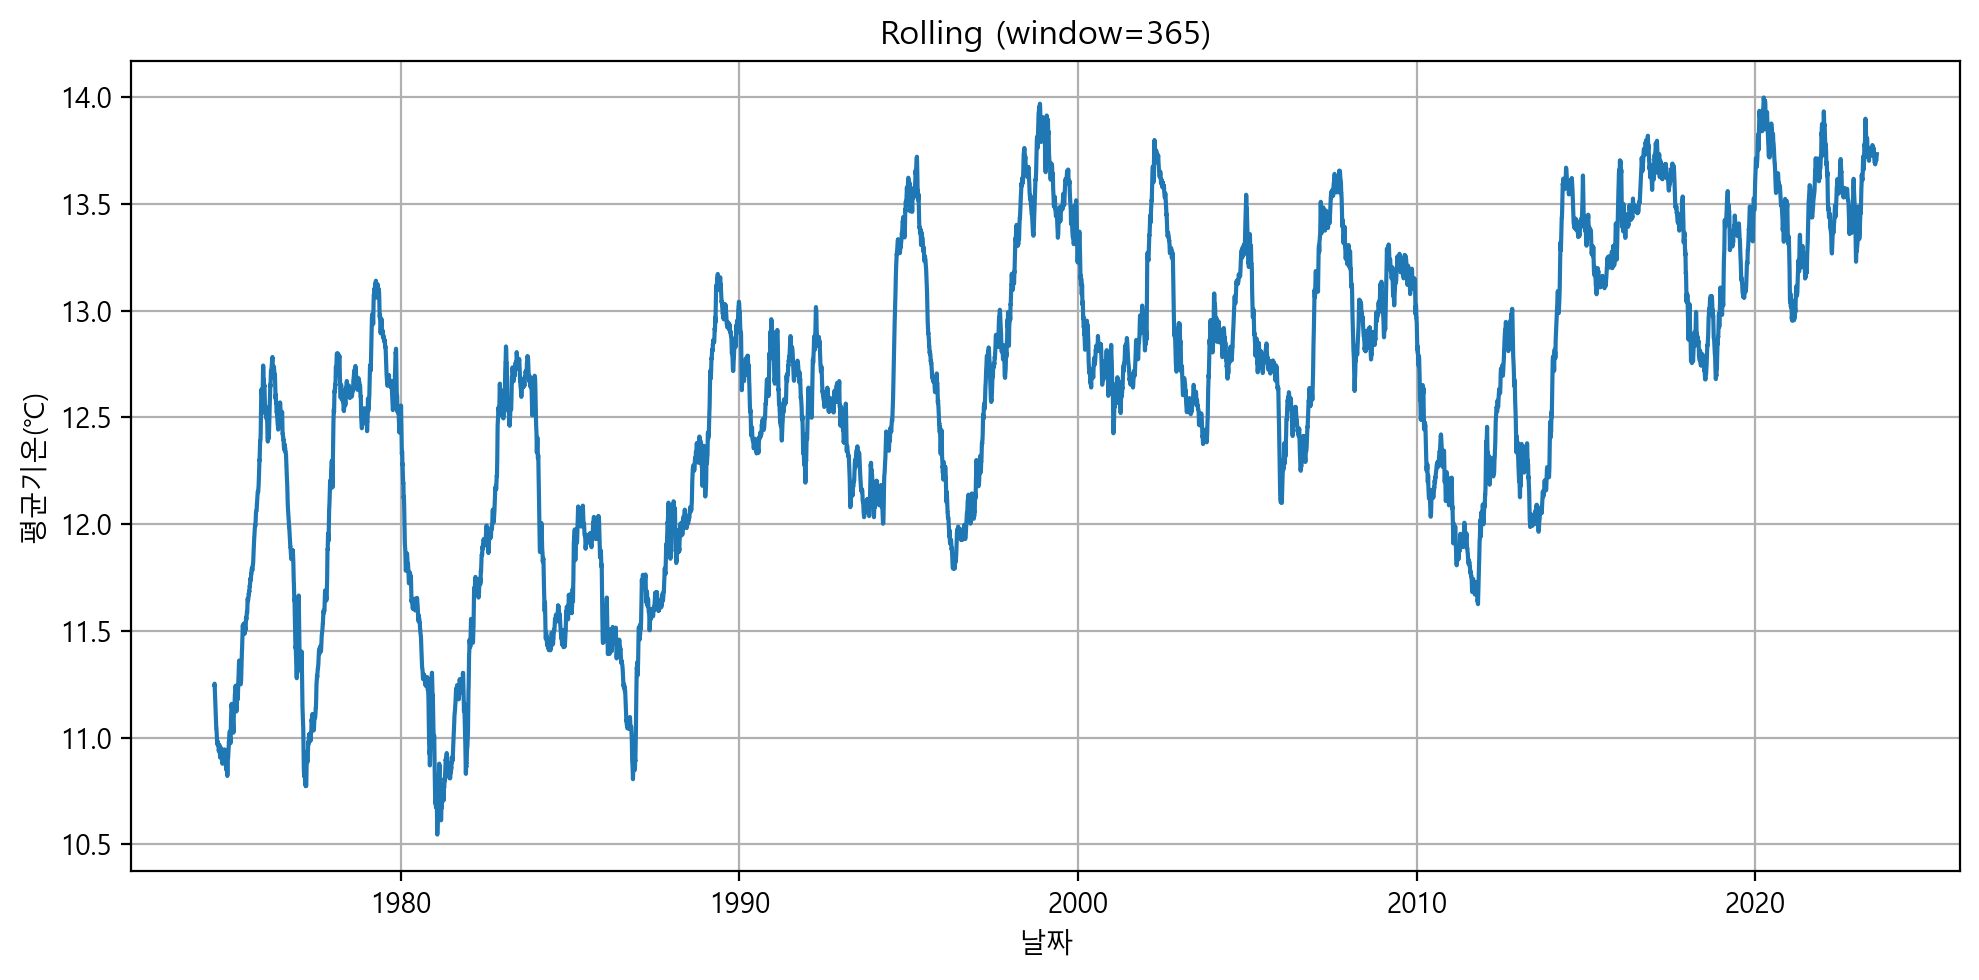

날짜
1973-07-01          NaN
1973-07-02          NaN
1973-07-03          NaN
1973-07-04          NaN
1973-07-05          NaN
                ...    
2023-08-02    13.717534
2023-08-03    13.724110
2023-08-04    13.727123
2023-08-05    13.729589
2023-08-06    13.732603
Name: 평균기온(℃), Length: 18299, dtype: float64

In [10]:
my_rolling(df['평균기온(℃)'], window=365, dpi=200)

### 지수평활

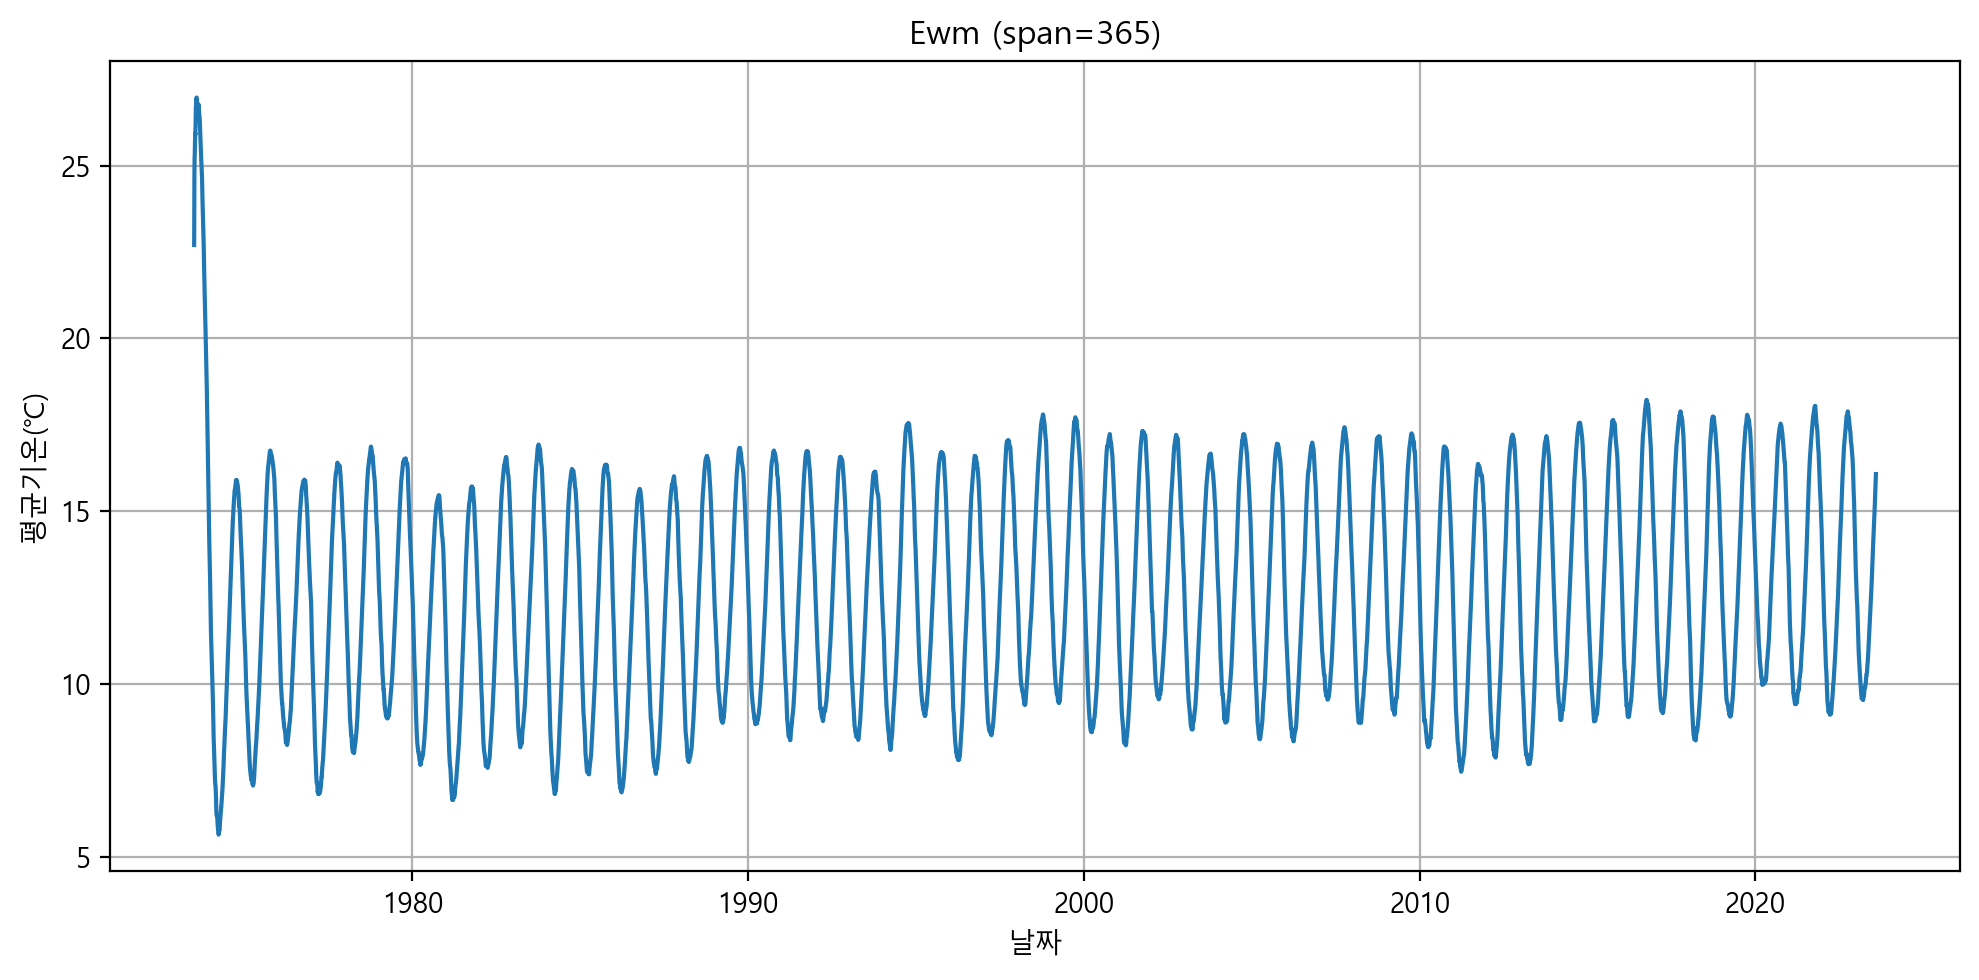

날짜
1973-07-01    22.700000
1973-07-02    23.251507
1973-07-03    24.574890
1973-07-04    24.732454
1973-07-05    25.170727
                ...    
2023-08-02    15.767307
2023-08-03    15.842349
2023-08-04    15.919713
2023-08-05    15.998294
2023-08-06    16.073713
Name: 평균기온(℃), Length: 18299, dtype: float64

In [11]:
my_ewm(df['평균기온(℃)'], span=365, dpi=200)

> 평균이 점점 상승하는 추세이고 평균은 계절성이 있는것으로 보인다. 성분 분해에 승법 모델을 적용

### 성분분해

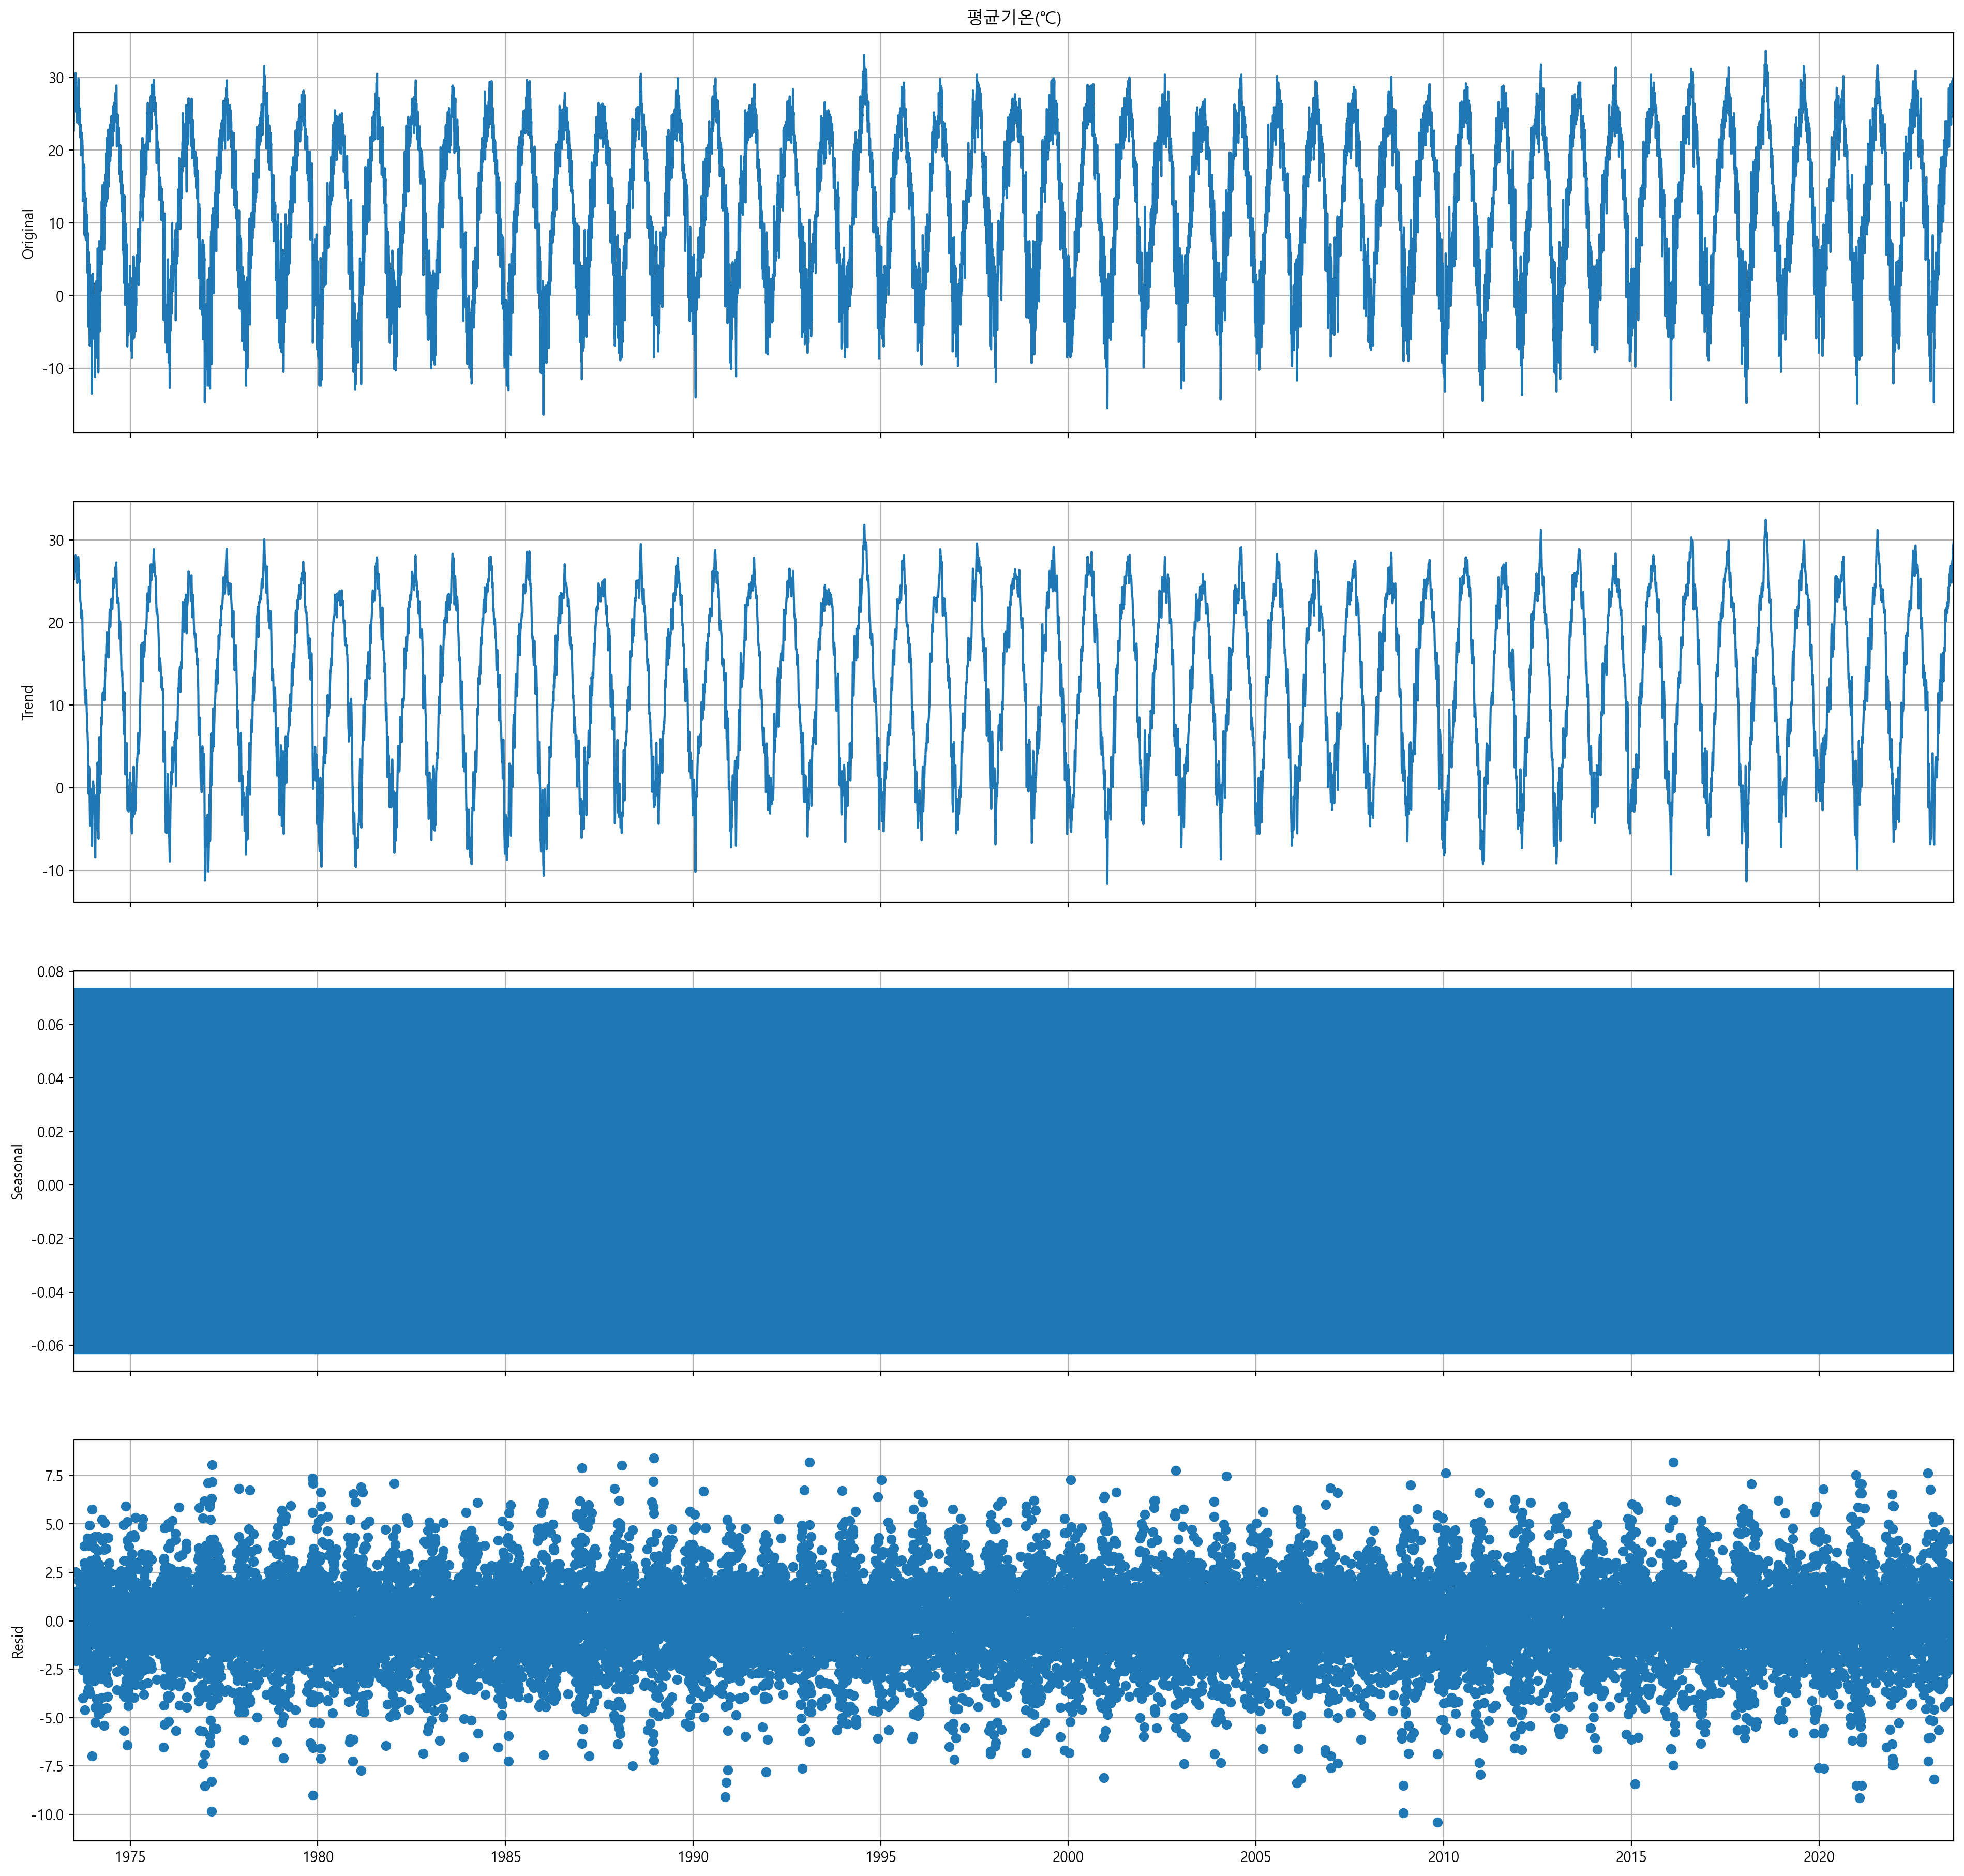

,original,trend,seasonal,resid
날짜,,,,
1973-07-01,22.7,NaN,0.003149,NaN
1973-07-02,23.8,NaN,-0.009317,NaN
1973-07-03,27.2,NaN,-0.062944,NaN
1973-07-04,25.2,25.242857,-0.052728,0.009870
1973-07-05,26.9,25.785714,0.015591,1.098694
...,...,...,...,...
2023-08-02,29.7,29.557143,-0.052728,0.195585
2023-08-03,29.5,29.700000,0.015591,-0.215591
2023-08-04,30.0,NaN,0.032895,NaN


In [14]:
my_seasonal_decompose(df['평균기온(℃)'], figsize=(20, 5), dpi=200)

> 계절성이 1년 (365일) 단위로 존재함을 확인


### ACF, PACF

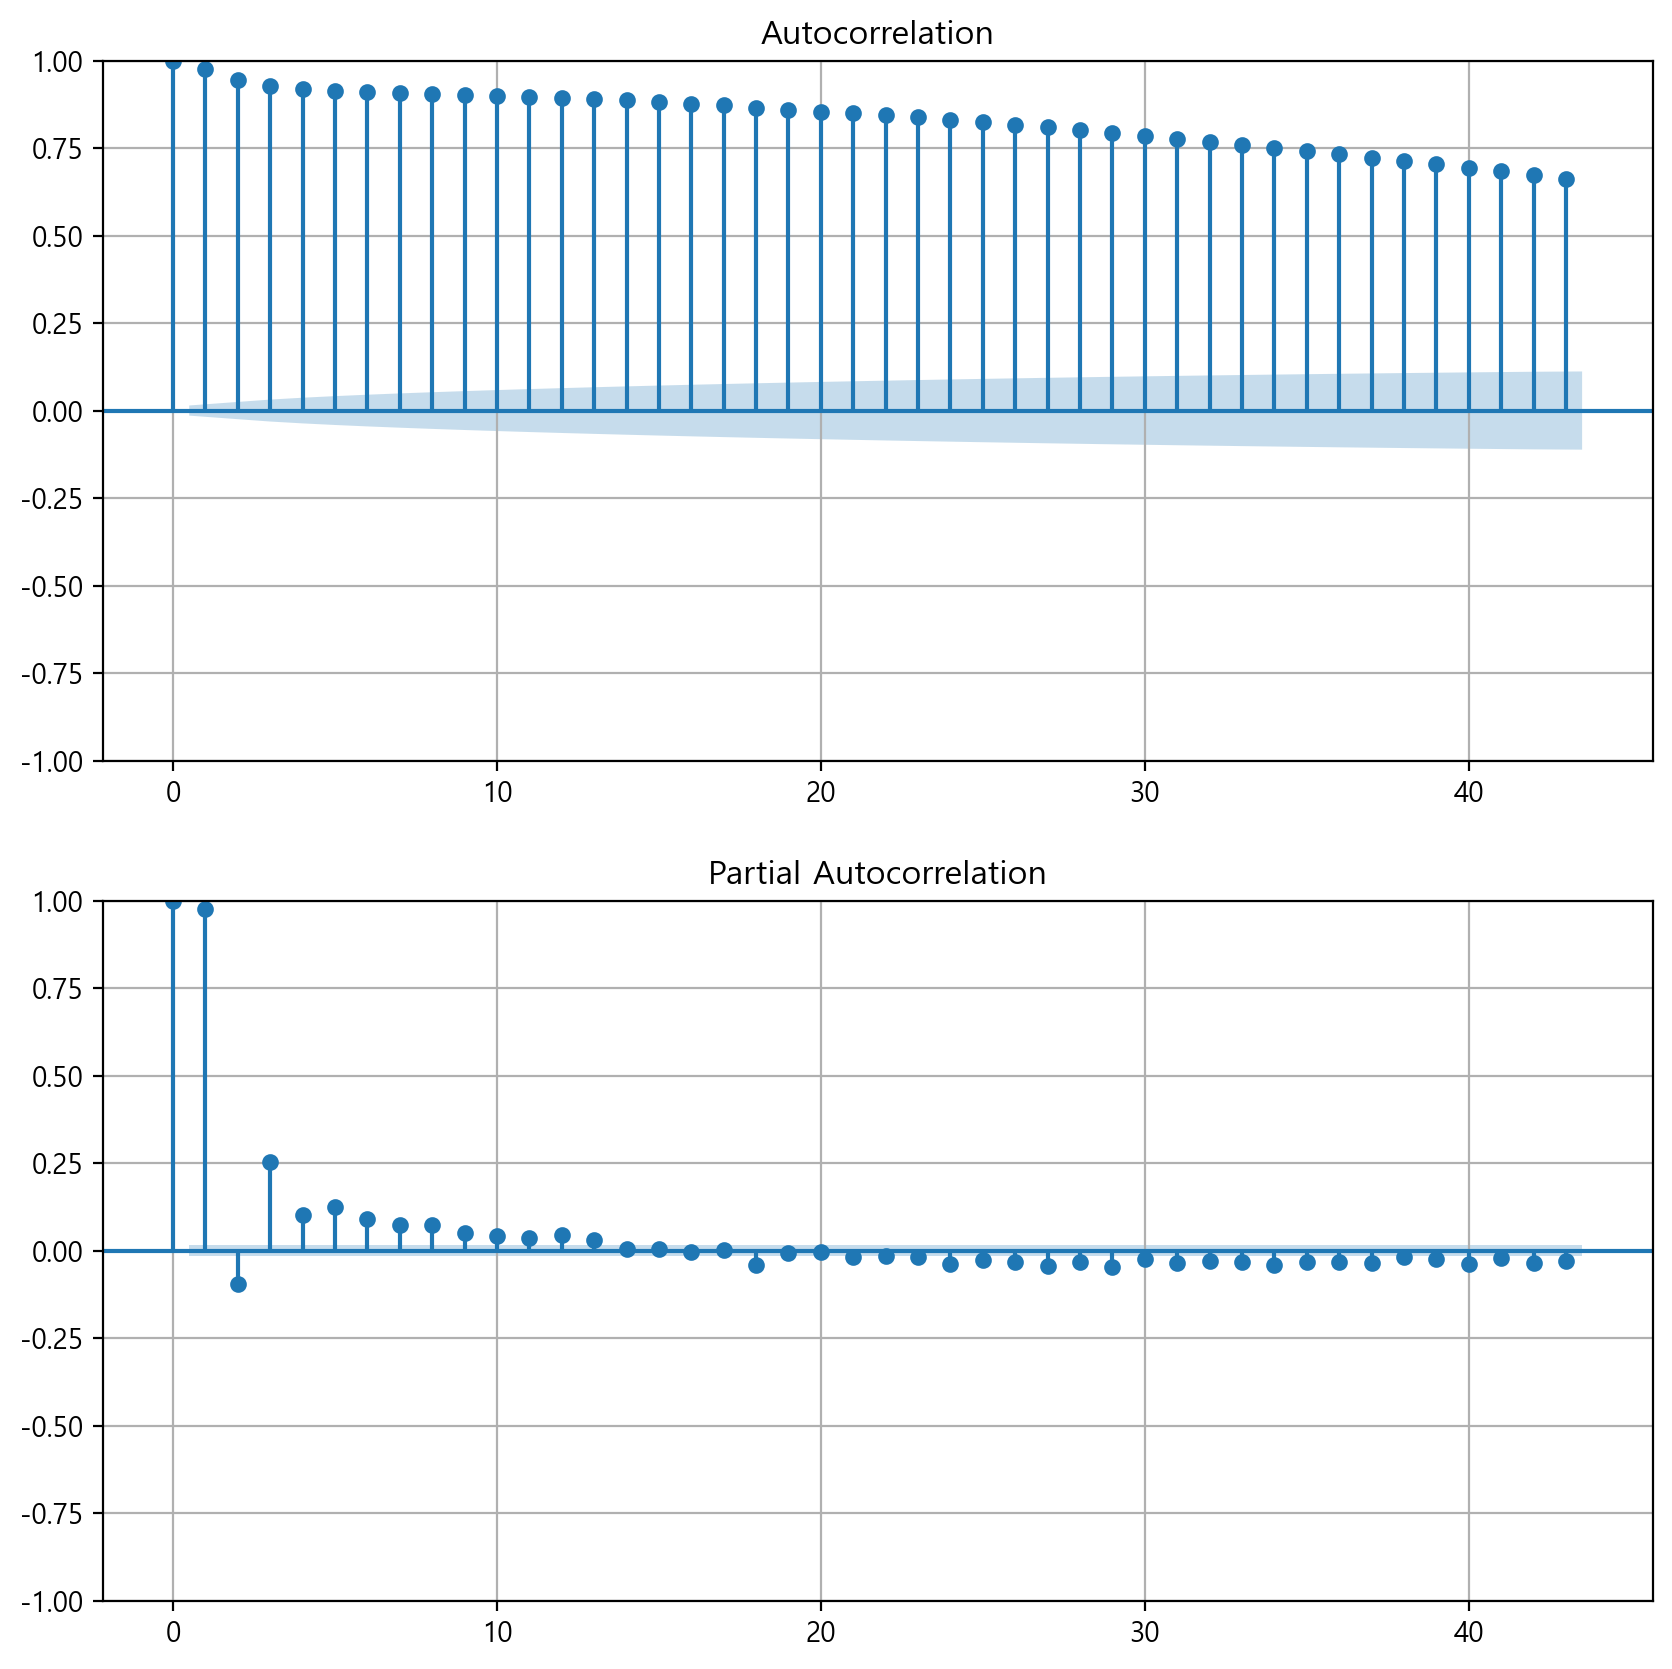

In [15]:
my_acf_pacf_plot(df['평균기온(℃)'], dpi=200)

### 분석 모형 생성

> 날씨에 대한 데이터이므로 계절성은 1년마다 돌아온다고 보는 것이 맞지만 컴퓨터 성능상의 한계로 계절성을 1주일 단위(=7일)로 제한함

In [16]:
train, test = my_timeseries_split(df)

                                    SARIMAX Results                                     
Dep. Variable:                          평균기온(℃)   No. Observations:                14639
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 30)   Log Likelihood              -33109.989
Date:                          Tue, 12 Mar 2024   AIC                          66227.978
Time:                                  17:05:23   BIC                          66258.344
Sample:                              07-01-1973   HQIC                         66238.065
                                   - 07-29-2013                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4446      0.894     13.915      0.000      10.692      14.198
ar.L1          0.9748      0.002    483.913      0.

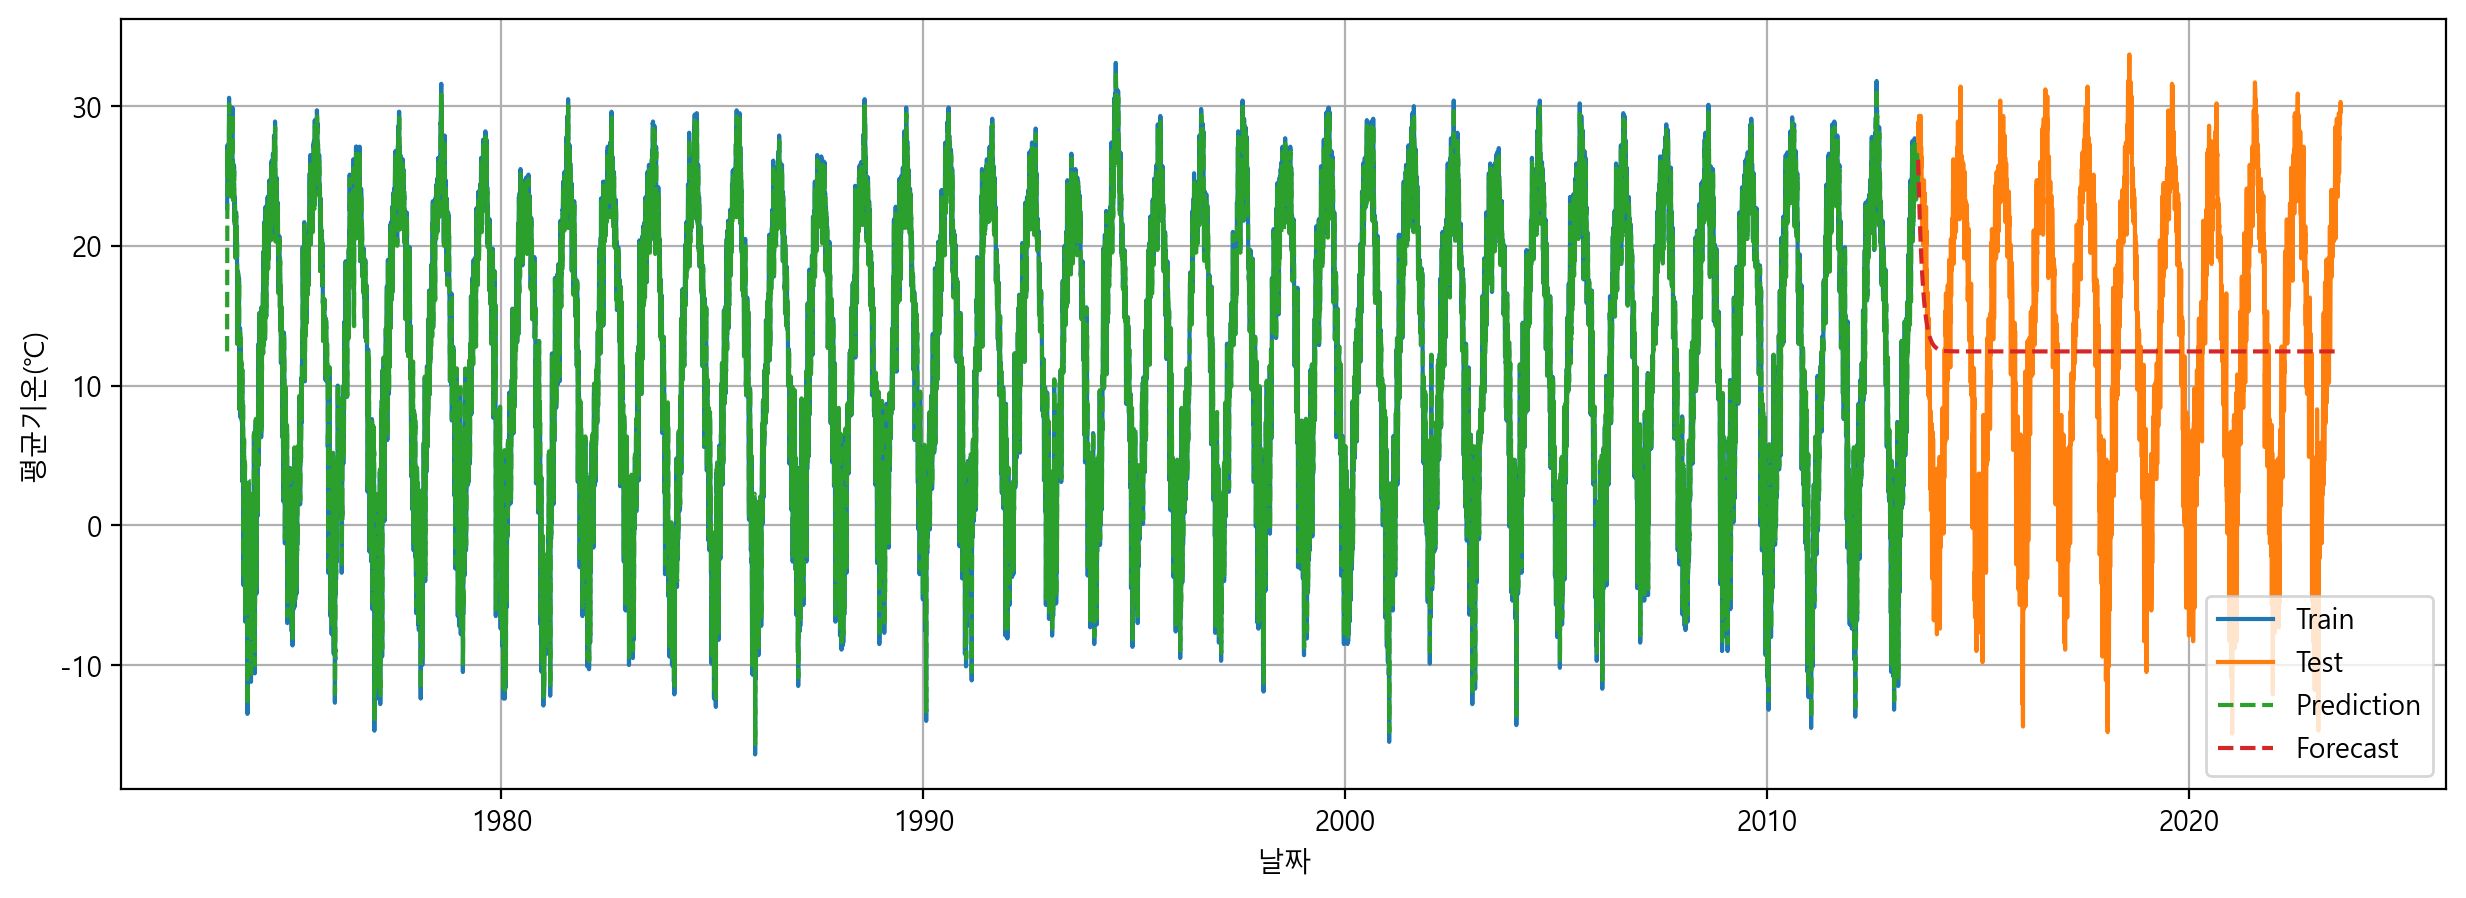

In [18]:
my_arima(train, test, auto=False, p=1, d=0, q=0, s=30, dpi=200)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리

In [ ]:
diff_df = my_diff(origin, '평균기온()')
my_pretty_table(diff_df.head())

In [80]:
# 처음부터 70% 위치 전까지 분할
train = origin[:int(0.7*len(origin))]
my_pretty_table(train.head())

# 70% 위치부터 끝까지 분할
test = origin[int(0.7*len(origin)):]
my_pretty_table(test.head())

+---------------------+---------------+
| 날짜                |   평균기온(℃) |
|---------------------+---------------|
| 1973-07-01 00:00:00 |          22.7 |
| 1973-07-02 00:00:00 |          23.8 |
| 1973-07-03 00:00:00 |          27.2 |
| 1973-07-04 00:00:00 |          25.2 |
| 1973-07-05 00:00:00 |          26.9 |
+---------------------+---------------+
+---------------------+---------------+
| 날짜                |   평균기온(℃) |
|---------------------+---------------|
| 2008-07-26 00:00:00 |          22.2 |
| 2008-07-27 00:00:00 |          25.1 |
| 2008-07-28 00:00:00 |          26.9 |
| 2008-07-29 00:00:00 |            28 |
| 2008-07-30 00:00:00 |          26.1 |
+---------------------+---------------+


In [82]:
my_p = 3    # 적절히 넉넉히
my_d = 2    # 차분 횟수 (검증한 결과를 활용)
my_q = 3    # 적절히 넉넉히
my_s = 365   # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y        = train,          # 모델링하려는 시계열 데이터 또는 배열
    start_p  = 0,              # p의 시작점
    max_p    = my_p,           # p의 최대값
    d        = my_d,           # 차분 횟수
    start_q  = 0,              # q의 시작점
    max_q    = my_q,           # q의 최대값
    seasonal = True,           # 계절성 사용 여부
    m        = my_s,           # 계절성 주기
    start_P  = 0,              # P의 시작점
    max_P    = my_p,           # P의 최대값
    D        = my_d,           # 계절성 차분 횟수
    start_Q  = 0,              # Q의 시작점
    max_Q    = my_q,           # Q의 최대값
    trace    = True            # 학습 과정 표시 여부
)

print(model.summary())

Performing stepwise search to minimize aic


## #04. 예상치 생성

### [1] 검증데이터에 대한 예측치

In [ ]:
pred = model.predict(n_periods=int(len(test))+12 )
pred[:5]

### [2] 관측치와 예상치 비교

In [ ]:
fig = plt.figure(figsize=(20,8), dpi=100)
ax = fig.gca()

# 훈련데이터 - 앞 70%의 원본 데이터
sb.lineplot(data=train, x=train.index, y='Passengers', label='Original(Train)', color='skyblue', ax=ax)

# 검증데이터 - 뒤 30%의 원본 데이터
sb.lineplot(data=test, x=test.index, y='Passengers', label='Original(Test)', color='blue', ax=ax)

# 예측치 - 뒤 30% + 12단계에 대한 예측 데이터
sb.lineplot(x=pred.index, y=pred.values, label='Predict(Test)', linestyle='--', color='red', ax=ax)

ax.grid()
ax.set_xlabel('Month')
ax.set_ylabel('Passengers')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = dates.DateFormatter('%y.%m')
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()
plt.close()

## #05. 성능평가 - 잔차 플롯 검토

In [ ]:
model.plot_diagnostics(figsize=(15, 10))
plt.show()
plt.close()

## #03. 분석 모형 구축

## 문제 2

다음의 데이터는 `2000년 01월`부터 `2022년 12월`까지 전국에서 출생한 신생아 수를 조사하여 시,도별로 표시한 자료의 일부이다.

| 시점        | 서울특별시  | 부산광역시 | 대구광역시 | 인천광역시 |
|-----------|--------|-------|-------|-------|
| 2022년 08월 | 3,670 | 1,249 | 854 | 1,265 |
| 2022년 09월 | 3,651 | 1,209 | 863 | 1,262 |
| 2022년 10월 | 3,612 | 1,166 | 848 | 1,200 |
| 2022년 11월 | 3,230 | 977   | 802 | 1,130 |
| 2022년 12월 | 2,901 | 957   | 663 | 1,018 |

전체 자료는 아래의 URL을 통해 내려받을 수 있다.

```plain
https://data.hossam.kr/tsdata/born_baby.xlsx
```

이 데이터를 활용하여 조사기간동안 전국에서 태어난 신생아 수가 어떻게 변화하고 있는지 분석하고 앞으로 5년간의 신생아 수를 예측한 자료를 시각화 하시오.

> 단, 조사되지 않은 항목에 대해서는 신생아수가 `0`인 것으로 간주한다.

### [2] 데이터 가져오기

#### DateTimeIndex 형태로 설정

In [7]:
origin = my_read_excel(path='https://data.hossam.kr/tsdata/born_baby.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       276 non-null    object
 1   서울특별시    276 non-null    int64 
 2   부산광역시    276 non-null    int64 
 3   대구광역시    276 non-null    int64 
 4   인천광역시    276 non-null    int64 
 5   광주광역시    276 non-null    int64 
 6   대전광역시    276 non-null    int64 
 7   울산광역시    276 non-null    int64 
 8   세종특별자치시  276 non-null    int64 
 9   경기도      276 non-null    int64 
 10  강원도      276 non-null    int64 
 11  충청북도     276 non-null    int64 
 12  충청남도     276 non-null    int64 
 13  전라북도     276 non-null    int64 
 14  전라남도     276 non-null    int64 
 15  경상북도     276 non-null    int64 
 16  경상남도     276 non-null    int64 
 17  제주특별자치도  276 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 38.9+ KB
None

데이터프레임 상위 5개 행
+----+-------------+--------------+--------------+--------------+--------------+--

In [12]:
df = origin.copy()
total_sum = df.loc[:,'서울특별시':'제주특별자치도'].sum(axis=1)
df['total_sum'] = total_sum
df.head()

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,total_sum
0,2000년 01월,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842,61644
1,2000년 02월,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764,56723
2,2000년 03월,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809,59878
3,2000년 04월,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680,53058
4,2000년 05월,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733,52492


In [31]:
from datetime import datetime

In [ ]:
df['시점'] = pd.to_datetime(df['시점'], format='%Y년 %m월')

In [60]:
date =[]
for i in range(len(df)):
    date.append(datetime.strptime(df['시점'][i], '%Y년 %m월'))

In [ ]:
k = origin['시점'].

In [75]:
df1 = df.filter('total_sum')
df1['월'] = date
df1['전국'] = total_sum
df1.set_index('월', inplace=True)

#### DateTimeIndex 확인

In [76]:
origin.index

RangeIndex(start=0, stop=276, step=1)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리

시계열 데이터 특성상 데이터가 순서대로 배치되어야 하므로 슬라이싱을 사용해야 한다.

In [77]:
# 처음부터 70% 위치 전까지 분할
train = df1[:int(0.7*len(df1))]
my_pretty_table(train.head())

# 70% 위치부터 끝까지 분할
test = df1[int(0.7*len(df1)):]
my_pretty_table(test.head())

+---------------------+--------+
| 월                  |   전국 |
|---------------------+--------|
| 2000-01-01 00:00:00 |  61644 |
| 2000-02-01 00:00:00 |  56723 |
| 2000-03-01 00:00:00 |  59878 |
| 2000-04-01 00:00:00 |  53058 |
| 2000-05-01 00:00:00 |  52492 |
+---------------------+--------+
+---------------------+--------+
| 월                  |   전국 |
|---------------------+--------|
| 2016-02-01 00:00:00 |  34830 |
| 2016-03-01 00:00:00 |  38131 |
| 2016-04-01 00:00:00 |  35147 |
| 2016-05-01 00:00:00 |  34341 |
| 2016-06-01 00:00:00 |  32849 |
+---------------------+--------+


In [78]:
my_p = 3    # 적절히 넉넉히
my_d = 2    # 차분 횟수 (검증한 결과를 활용)
my_q = 3    # 적절히 넉넉히
my_s = 12   # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y        = train,          # 모델링하려는 시계열 데이터 또는 배열
    start_p  = 0,              # p의 시작점
    max_p    = my_p,           # p의 최대값
    d        = my_d,           # 차분 횟수
    start_q  = 0,              # q의 시작점
    max_q    = my_q,           # q의 최대값
    seasonal = True,           # 계절성 사용 여부
    m        = my_s,           # 계절성 주기
    start_P  = 0,              # P의 시작점
    max_P    = my_p,           # P의 최대값
    D        = my_d,           # 계절성 차분 횟수
    start_Q  = 0,              # Q의 시작점
    max_Q    = my_q,           # Q의 최대값
    trace    = True            # 학습 과정 표시 여부
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=3221.286, Time=0.10 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=3148.079, Time=0.94 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=3195.441, Time=0.11 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=3090.503, Time=2.29 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=3093.216, Time=2.49 sec
 ARIMA(1,2,0)(2,2,1)[12]             : AIC=inf, Time=4.46 sec
 ARIMA(1,2,0)(1,2,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(1,2,0)(3,2,1)[12]             : AIC=inf, Time=9.12 sec
 ARIMA(0,2,0)(2,2,0)[12]             : AIC=3156.093, Time=0.48 sec
 ARIMA(2,2,0)(2,2,0)[12]             : AIC=3080.436, Time=0.92 sec
 ARIMA(2,2,0)(1,2,0)[12]             : AIC=3125.662, Time=0.47 sec
 ARIMA(2,2,0)(3,2,0)[12]             : AIC=3036.081, Time=4.71 sec
 ARIMA(2,2,0)(3,2,1)[12]             : AIC=3052.332, Time=3.72 sec
 ARIMA(2,2,0)(2,2,1)[12]             : 

> Best model:  ARIMA(1,2,1)(3,2,0)[12] 

NameError: name 'auto_arima' is not defined

In [1]:
pred = model.predict(n_periods=int(len(test))+12 )
pred[:5]

NameError: name 'model' is not defined